# The seventh Korea National Health and Nutrition Examination Survey (KNHANES Ⅶ) 
# - Nutrition Examination Survey, Demographic characteristics and Cardiovascular disease

- Korea Centers for Disease Control and Prevention
- [DOWNLOAD](https://knhanes.cdc.go.kr/knhanes/sub03/sub03_02_02.do)

In [3]:
# SQL

# SELECT public."HS"."ID", public."HS"."sex", public."HS"."age", public."HS"."incm", public."HS"."edu", public."HS_HS"."DI3_dg", public."HS_HS"."DI5_dg", public."HS_HS"."DI6_dg" INTO public."Cardiovascular" FROM public."HS", public."HS_HS" WHERE public."HS"."ID" = public."HS_HS"."ID";

# select public."Cardiovascular".*, "N_WATER", "N_PROT", "N_FAT", "N_SFA", "N_MUFA", "N_PUFA", "N_N3",
#       "N_N6", "N_CHOL", "N_CHO", "N_TDF", "N_SUGAR", "N_CA", "N_PHOS", "N_FE",
#       "N_NA", "N_K", "N_VA", "N_VA_RAE", "N_CAROT", "N_RETIN", "N_B1", "N_B2",
#      "N_NIAC" into public."Cardiovascular_NT" FROM public."Cardiovascular", public."NT" WHERE public."Cardiovascular"."ID" = public."NT"."ID";


# 1. RawData
## 1-1. Library

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

## 1-2. Visualization Setting

In [5]:
# Window Korean Font
plt.rc('font', family='Malgun Gothic')

%matplotlib inline

from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

## 1-3. Data

In [34]:
df = pd.read_csv("Cardiovascular_NT.csv", low_memory=False)
df.shape

(24269, 32)

In [35]:
df.columns

Index(['ID', 'sex', 'age', 'incm', 'edu', 'DI3_dg', 'DI5_dg', 'DI6_dg',
       'N_WATER', 'N_PROT', 'N_FAT', 'N_SFA', 'N_MUFA', 'N_PUFA', 'N_N3',
       'N_N6', 'N_CHOL', 'N_CHO', 'N_TDF', 'N_SUGAR', 'N_CA', 'N_PHOS', 'N_FE',
       'N_NA', 'N_K', 'N_VA', 'N_VA_RAE', 'N_CAROT', 'N_RETIN', 'N_B1', 'N_B2',
       'N_NIAC'],
      dtype='object')

# 2. Data preprocessing
## 2-1. Remove NULL Columns
- X

In [36]:
 df_pp = df.copy(deep=False)

## 2-2. Remove NULL Rows

In [37]:
null_count = df_pp.isnull().sum()
null_count

ID             0
sex            0
age            0
incm          86
edu         2106
DI3_dg      1133
DI5_dg      1133
DI6_dg      1133
N_WATER     2998
N_PROT      2998
N_FAT       2998
N_SFA       2998
N_MUFA      2998
N_PUFA      2998
N_N3        2998
N_N6        2998
N_CHOL      2998
N_CHO       2998
N_TDF       2998
N_SUGAR     2998
N_CA        2998
N_PHOS      2998
N_FE        2998
N_NA        2998
N_K         2998
N_VA        2998
N_VA_RAE    2998
N_CAROT     2998
N_RETIN     2998
N_B1        2998
N_B2        2998
N_NIAC      2998
dtype: int64

In [38]:
print(df_pp.shape)
df_pp = df_pp.dropna(axis=0)
print(df_pp.shape)

(24269, 32)
(19389, 32)


## 2-3. Remove Row not applied and not known
- 8, 9

In [40]:
drop_index = df_pp[(df_pp['DI3_dg'] == 8) | (df_pp['DI3_dg'] == 9)].index
df_pp = df_pp.drop(drop_index)
print(df_pp.shape)
drop_index = df_pp[(df_pp['DI5_dg'] == 8) | (df_pp['DI5_dg'] == 9)].index
df_pp = df_pp.drop(drop_index)
print(df_pp.shape)
drop_index = df_pp[(df_pp['DI6_dg'] == 8) | (df_pp['DI6_dg'] == 9)].index
df_pp = df_pp.drop(drop_index)
print(df_pp.shape)

(15267, 32)
(15267, 32)
(15267, 32)


## 2-3. Remove Outlier
- IQR(Inter Qunatile Range) Method

In [41]:
df_pp.describe()

,sex,age,incm,edu,DI3_dg,DI5_dg,DI6_dg,N_WATER,N_PROT,N_FAT,...,N_FE,N_NA,N_K,N_VA,N_VA_RAE,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC
count,15267.000000,15267.000000,15267.000000,15267.000000,15267.000000,15267.000000,15267.000000,15267.000000,15267.000000,15267.000000,...,15267.000000,15267.000000,15267.000000,15267.000000,15267.000000,15267.000000,15267.000000,15267.000000,15267.000000,15267.000000
mean,1.581516,51.807493,2.505338,2.837493,0.024563,0.011856,0.021615,669.727548,59.943387,32.761368,...,1082.209711,3183.725465,2078.221071,525.410459,1183.258787,1901.739816,94.009437,1.366777,5.290994,29.306505
std,0.493327,16.854918,1.117384,1.142586,0.154793,0.108240,0.145428,633.597399,39.521108,31.709828,...,1993.372060,1933.672984,1577.156905,564.800375,2440.222556,2510.210859,295.981256,0.807383,7.037354,46.966136
min,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.010000,...,0.010000,9.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000
25%,1.000000,38.000000,2.000000,2.000000,0.000000,0.000000,0.000000,87.275000,32.960000,11.240000,...,8.850000,1903.320000,726.575000,220.260000,212.420000,147.690000,1.330000,0.840000,1.110000,9.210000
50%,2.000000,52.000000,3.000000,3.000000,0.000000,0.000000,0.000000,553.980000,52.770000,24.100000,...,14.390000,2809.080000,1898.410000,389.830000,416.900000,1132.550000,22.280000,1.200000,1.910000,14.520000
75%,2.000000,65.000000,4.000000,4.000000,0.000000,0.000000,0.000000,1029.460000,77.815000,44.165000,...,1782.995000,4018.955000,2998.150000,656.890000,1207.865000,2709.195000,113.835000,1.690000,7.710000,28.130000
max,2.000000,80.000000,4.000000,4.000000,1.000000,1.000000,1.000000,9088.170000,682.170000,558.800000,...,39667.450000,41287.590000,24671.730000,14049.000000,145039.530000,41856.030000,11554.590000,11.560000,94.230000,1277.340000


In [42]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return lower_bound, upper_bound

col_names =['N_WATER', 'N_PROT', 'N_FAT', 'N_SFA', 'N_MUFA', 'N_PUFA', 'N_N3',
       'N_N6', 'N_CHOL', 'N_CHO', 'N_TDF', 'N_SUGAR', 'N_CA', 'N_PHOS', 'N_FE',
       'N_NA', 'N_K', 'N_VA', 'N_VA_RAE', 'N_CAROT', 'N_RETIN', 'N_B1', 'N_B2',
       'N_NIAC']

print(df_pp.shape)

for i in range (0,23):
    col_name = col_names[i]
    drop_outlier = outliers_iqr(df_pp[col_name])
    #print(drop_outlier)
    df_pp = df_pp[(df_pp[col_name]<= drop_outlier[1]) & (df_pp[col_name] >= drop_outlier[0])]
    

print(df_pp.shape)


(15267, 32)
(6031, 32)


In [43]:
df_pp.describe()

,sex,age,incm,edu,DI3_dg,DI5_dg,DI6_dg,N_WATER,N_PROT,N_FAT,...,N_FE,N_NA,N_K,N_VA,N_VA_RAE,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC
count,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,...,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000
mean,1.648814,54.539214,2.439065,2.650307,0.031172,0.014425,0.024208,742.323908,51.164357,27.370224,...,8.874243,2529.183601,2146.670187,368.125961,216.333931,1824.916329,63.970539,0.987616,1.065954,9.701945
std,0.477380,17.068191,1.117727,1.183741,0.173798,0.119247,0.153708,417.870403,21.650054,15.860923,...,3.810701,1278.307772,860.489070,220.568748,124.736180,1244.283580,63.167880,0.401007,0.497099,4.509201
min,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.070000,...,0.010000,9.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000
25%,1.000000,41.000000,1.000000,1.000000,0.000000,0.000000,0.000000,433.750000,35.505000,14.905000,...,6.150000,1567.735000,1518.780000,197.610000,117.210000,859.475000,10.015000,0.690000,0.690000,6.555000
50%,2.000000,56.000000,2.000000,3.000000,0.000000,0.000000,0.000000,672.450000,48.700000,25.290000,...,8.450000,2356.960000,2081.840000,331.200000,201.760000,1521.660000,44.260000,0.950000,1.020000,9.150000
75%,2.000000,69.000000,3.000000,4.000000,0.000000,0.000000,0.000000,971.060000,64.920000,37.630000,...,11.195000,3352.535000,2707.380000,502.085000,297.010000,2594.070000,101.605000,1.245000,1.400000,12.070000
max,2.000000,80.000000,4.000000,4.000000,1.000000,1.000000,1.000000,2436.680000,133.700000,83.720000,...,21.460000,6412.460000,4788.870000,1072.720000,634.830000,5428.620000,263.720000,2.150000,2.500000,59.720000


## 2-4. Remove Multicollinearity
- 다중공선성 : 하나의 독립변수가 다른 여러 개의 독립변수들로 잘 예측되는 경우
- 분산팽창계수(VIF) > 10 변수 제거
- 종속변수를 선정 후, 수행할 예정

## 2-5. Data Normalization
- 향후 진행
- Min-Max Normalization
- Z-Score Normalization

## 2-6. Save

In [44]:
df_pp.to_csv('Cardiovascular_NT_pp_final.csv', index = None)

# 3. Statistics
## 3-1. basic

In [45]:
df = pd.read_csv("Cardiovascular_NT_pp_final.csv", low_memory=False)
df.head()

,ID,sex,age,incm,edu,DI3_dg,DI5_dg,DI6_dg,N_WATER,N_PROT,...,N_FE,N_NA,N_K,N_VA,N_VA_RAE,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC
0,B661222101,2,68,2.0,1.0,0.0,0.0,0.0,4.80,0.84,...,16.85,266.10,33.16,16.58,198.96,0.00,0.07,0.05,0.70,7.34
1,A601169401,1,76,3.0,3.0,0.0,0.0,0.0,421.53,56.53,...,10.36,2577.83,1770.27,175.95,112.27,764.16,48.59,1.22,0.87,8.17
2,A601177901,1,39,1.0,3.0,0.0,0.0,0.0,1221.63,85.98,...,12.90,5149.46,3231.04,488.83,258.17,2767.86,27.52,1.83,1.52,19.91
3,A601177902,2,35,1.0,4.0,0.0,0.0,0.0,404.80,58.11,...,8.80,2312.21,1663.74,295.62,158.08,1650.56,20.53,1.25,0.84,11.95
4,A601208502,2,68,2.0,2.0,0.0,0.0,0.0,606.94,44.69,...,9.33,2856.32,2043.58,371.73,218.98,1833.05,66.22,1.30,0.73,6.79


## 3-2. Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000264E99C1EC8>,
      dtype=object)

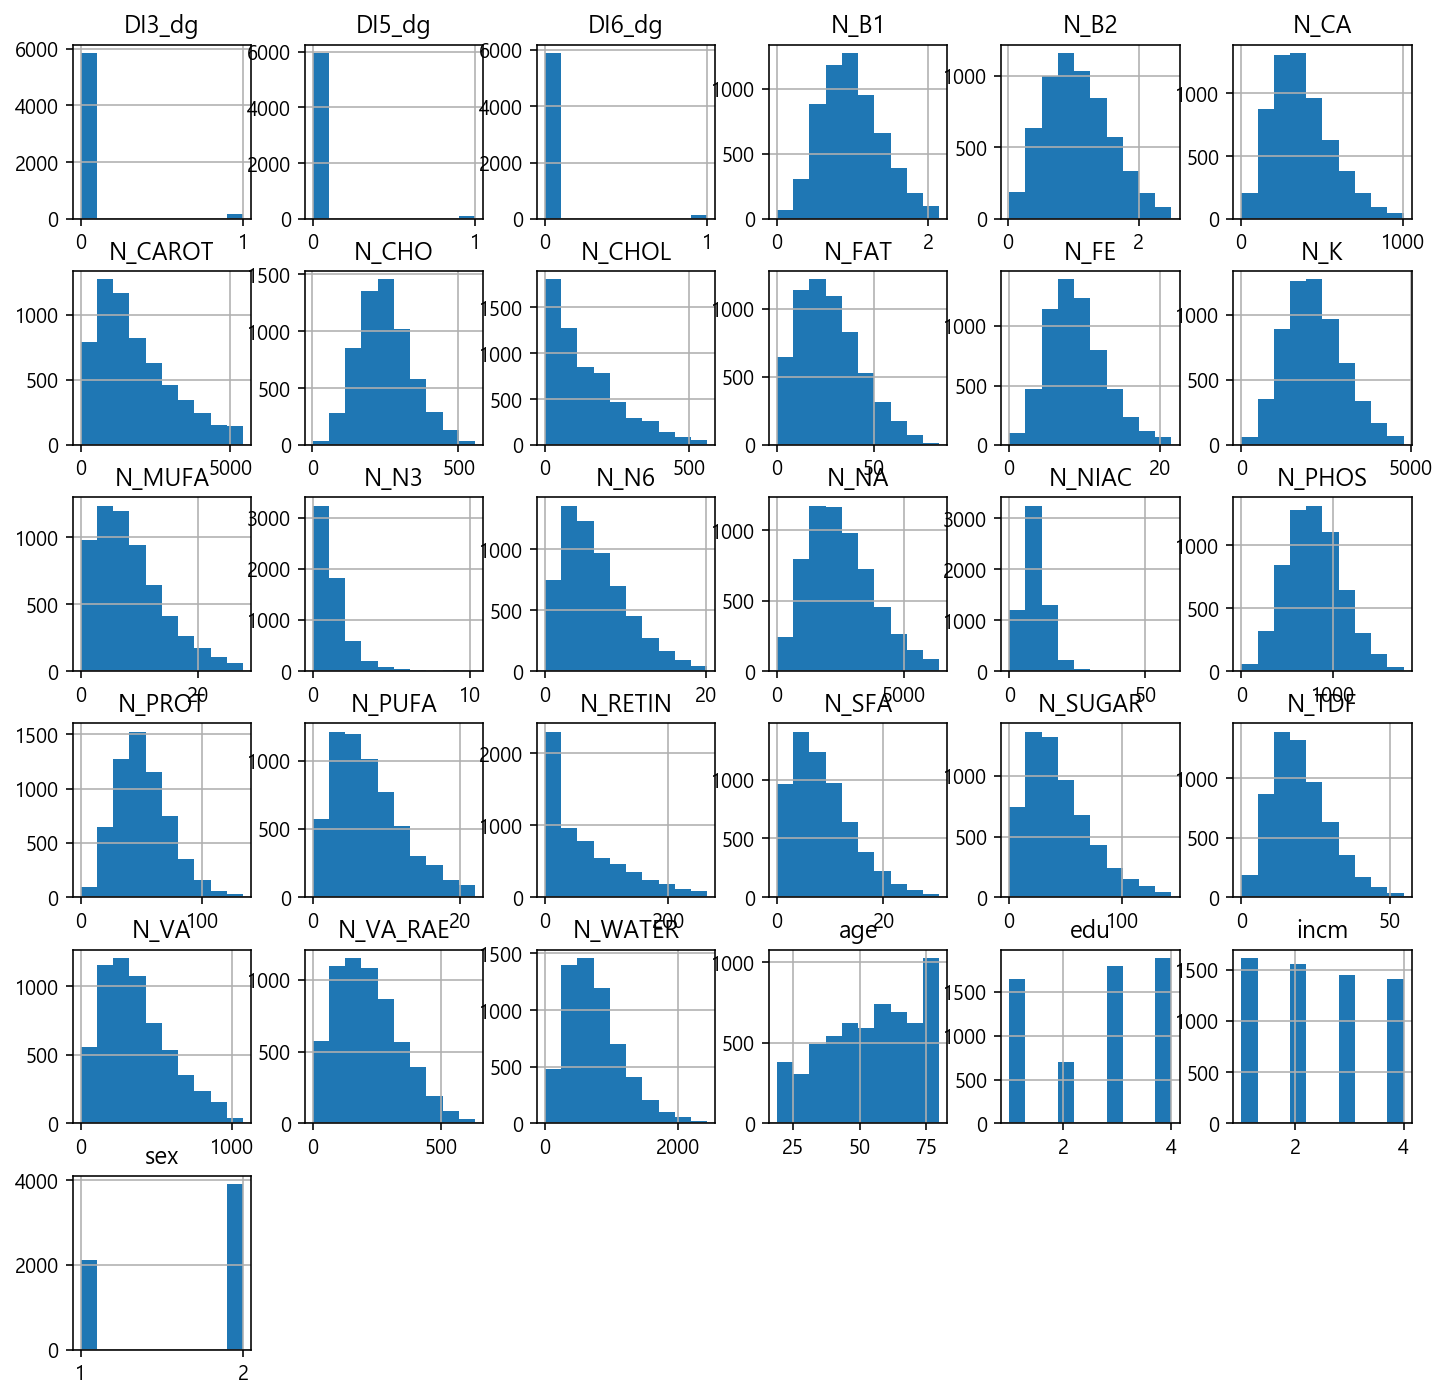

In [46]:
h = df.hist(figsize=(12, 12))
h

## 3-3. Correlation analysis

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


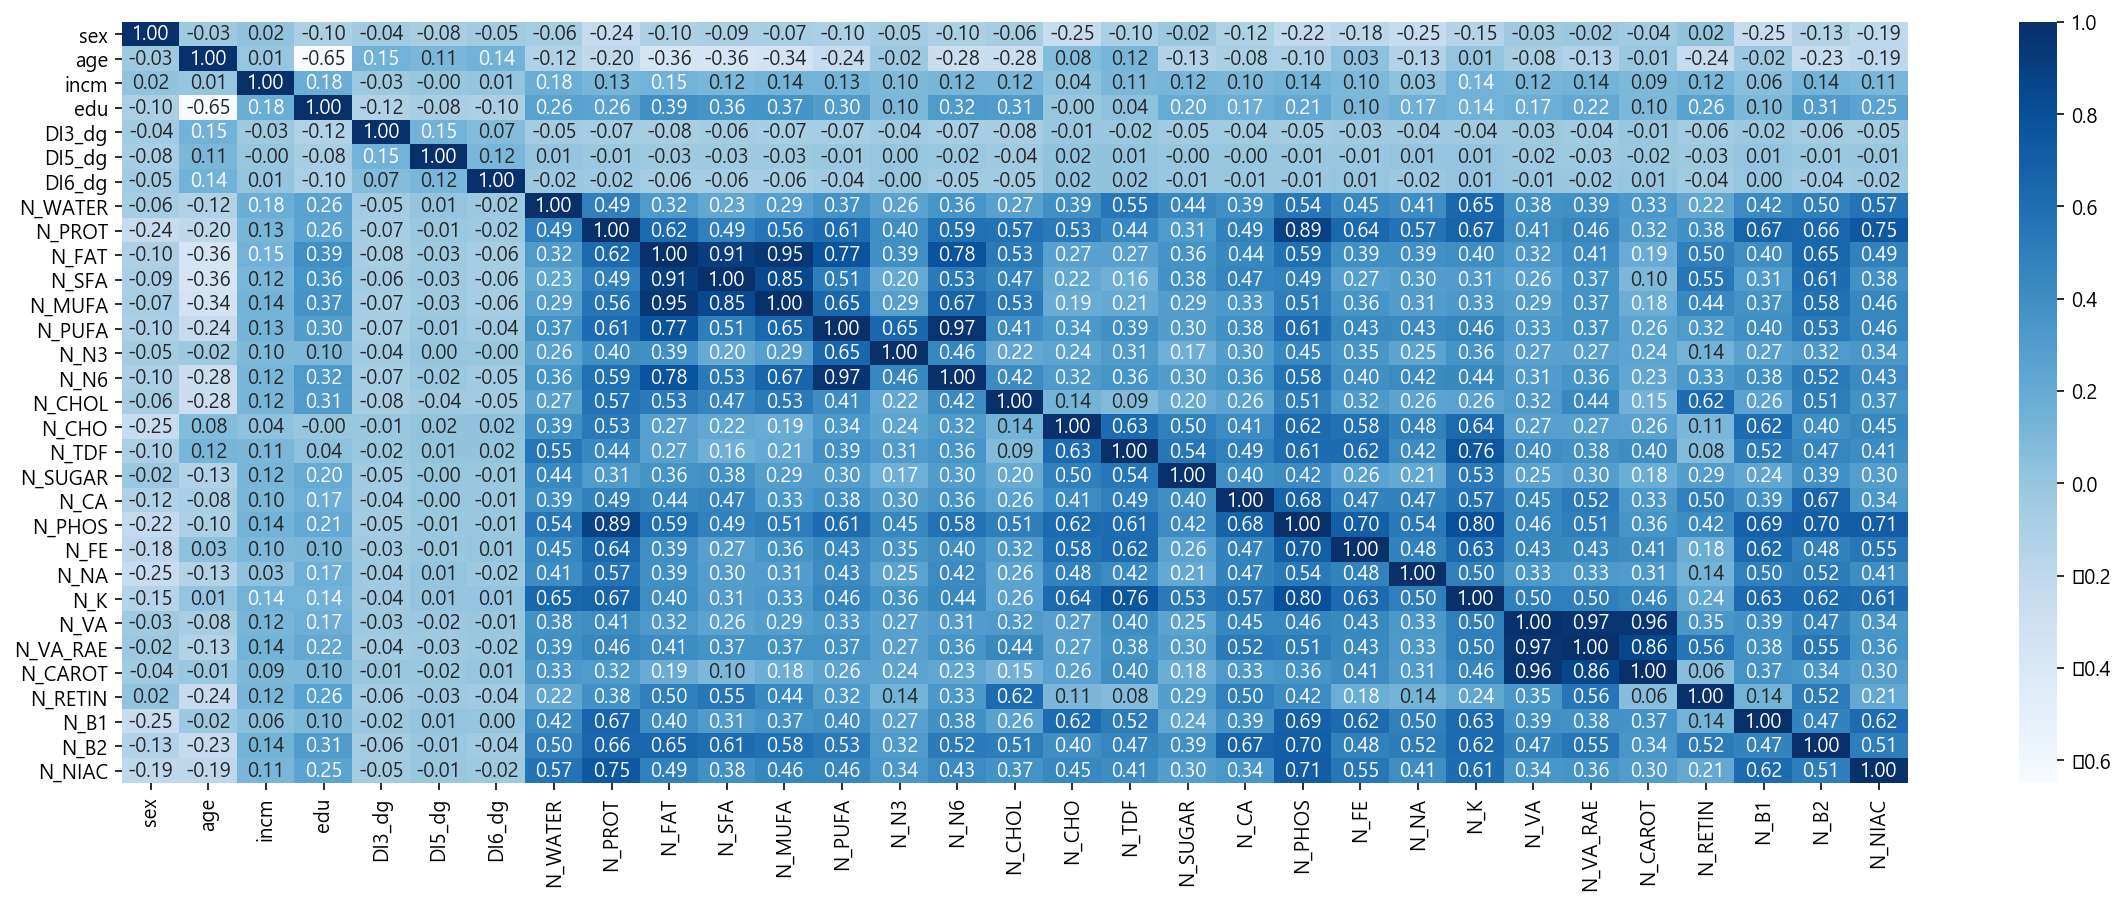

In [47]:
df_corr = df.corr()

mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

plt.figure(figsize=(20, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues")

- 독립 변수 간 상관관계가 높은 항목의 경우, 모델 적용 시 제거 및 추가적인 처리 필요

In [48]:
for i in range(0,23):
    col_name = col_names[i]
    print(df_corr.loc[df_corr[col_name] > 0.6, col_name])
    print("--------------------")

N_WATER    1.000000
N_K        0.646191
Name: N_WATER, dtype: float64
--------------------
N_PROT    1.000000
N_FAT     0.621402
N_PUFA    0.607957
N_PHOS    0.891569
N_FE      0.639529
N_K       0.670742
N_B1      0.668438
N_B2      0.656088
N_NIAC    0.747343
Name: N_PROT, dtype: float64
--------------------
N_PROT    0.621402
N_FAT     1.000000
N_SFA     0.914601
N_MUFA    0.949259
N_PUFA    0.770146
N_N6      0.778248
N_B2      0.651653
Name: N_FAT, dtype: float64
--------------------
N_FAT     0.914601
N_SFA     1.000000
N_MUFA    0.851042
N_B2      0.608747
Name: N_SFA, dtype: float64
--------------------
N_FAT     0.949259
N_SFA     0.851042
N_MUFA    1.000000
N_PUFA    0.649294
N_N6      0.668123
Name: N_MUFA, dtype: float64
--------------------
N_PROT    0.607957
N_FAT     0.770146
N_MUFA    0.649294
N_PUFA    1.000000
N_N3      0.646224
N_N6      0.971930
N_PHOS    0.608127
Name: N_PUFA, dtype: float64
--------------------
N_PUFA    0.646224
N_N3      1.000000
Name: N_N3, dty